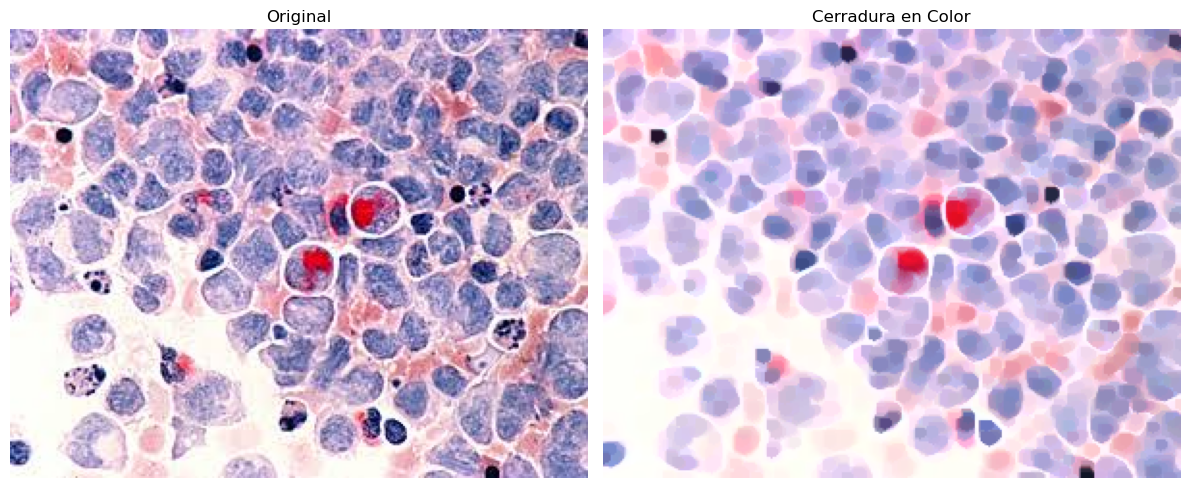

In [3]:
import cv2
from skimage import morphology
import matplotlib.pyplot as plt
import numpy as np
 
# Hit or miss Opencv

img = cv2.imread('..//img/cancer.jpg', 1)
kernel1 = np.array((
        [1, 1, 1],
        [0, 1, -1],
        [0, 1, -1]), dtype="int")

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6))
 
channels = cv2.split(img)

cerradura_channels = [cv2.morphologyEx(channel, cv2.MORPH_CLOSE, kernel) for channel in channels]

cerradura_color = cv2.merge(cerradura_channels)


plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Cerradura en Color')
plt.imshow(cv2.cvtColor(cerradura_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

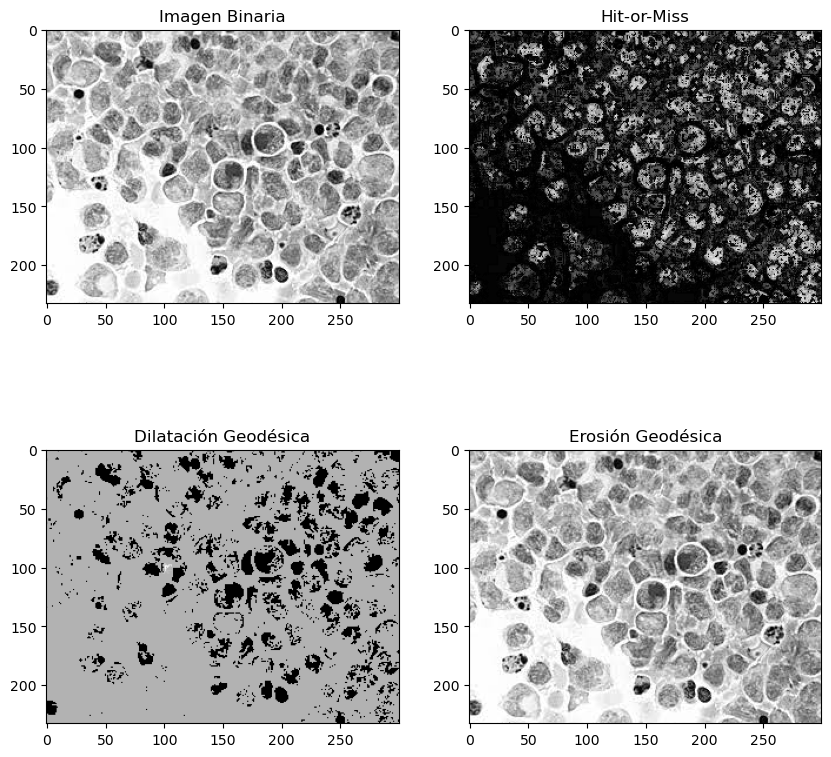

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hit_or_miss(image, k1, k2):
    hit = cv2.erode(image, k1)
    miss = cv2.erode(1 - image, k2)
    return cv2.bitwise_and(hit, miss)

def geodesic_dilation(marker, mask, kernel):
    prev_marker = None
    while not np.array_equal(marker, prev_marker):
        prev_marker = marker.copy()
        marker = cv2.dilate(marker, kernel)
        marker = cv2.bitwise_and(marker, mask)
    return marker

def geodesic_erosion(marker, mask, kernel, iterations=1):
    for _ in range(iterations):
        marker = cv2.erode(marker, kernel)
        marker = cv2.bitwise_or(marker, mask)
    return marker

image = cv2.imread('..//img/cancer.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

binary_image = image

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
k1 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
k2 = np.array([[1, 0, 1], [0, 0, 0], [1, 0, 1]], dtype=np.uint8)

hit_miss_result = hit_or_miss(binary_image, k1, k2)

marker = np.zeros_like(binary_image)
marker[100, 100] = 255  
mask = binary_image

geo_dilation_result = geodesic_dilation(marker, mask, kernel)

geo_erosion_result = geodesic_erosion(marker, mask, kernel)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Imagen Binaria')
plt.imshow(binary_image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Hit-or-Miss')
plt.imshow(hit_miss_result, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Dilatación Geodésica')
plt.imshow(geo_dilation_result, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Erosión Geodésica')
plt.imshow(geo_erosion_result, cmap='gray')

plt.show()



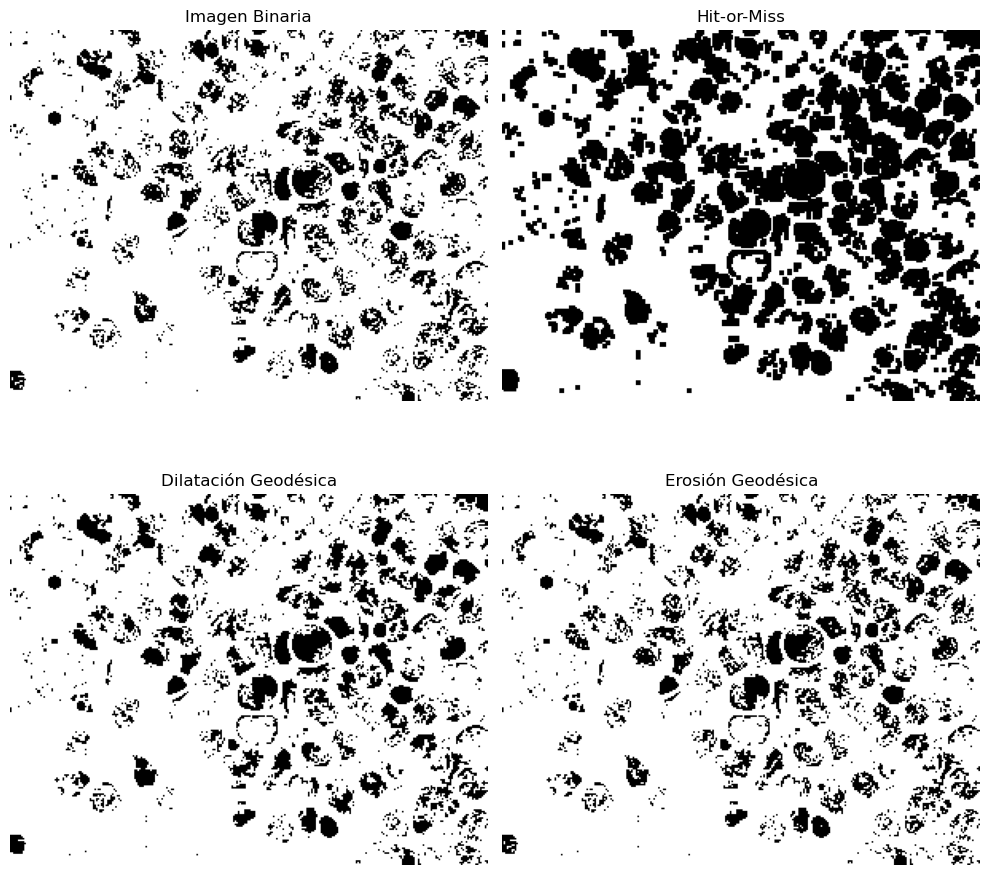

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, img_as_ubyte
import cv2


def hit_or_miss(image, selem_hit, selem_miss):
    hit = morphology.erosion(image, selem_hit)
    miss = morphology.erosion(image, selem_miss)
    return hit & miss

def geodesic_dilation(marker, mask, selem):
    prev_marker = np.zeros_like(marker)
    while not np.array_equal(marker, prev_marker):
        prev_marker = marker.copy()
        marker = morphology.dilation(marker, selem)
        marker = np.minimum(marker, mask)
    return marker

def geodesic_erosion(marker, mask, selem):
    prev_marker = np.zeros_like(marker)
    while not np.array_equal(marker, prev_marker):
        prev_marker = marker.copy()
        marker = morphology.erosion(marker, selem)
        marker = np.maximum(marker, mask)
    return marker

image = io.imread('..//img/cancer.jpg', as_gray=True)
binary_image = img_as_ubyte(image > 0.5)

selem = morphology.diamond(1)
selem_hit = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=bool)
selem_miss = np.array([[1, 0, 1], [0, 0, 0], [1, 0, 1]], dtype=bool)

hit_miss_result = hit_or_miss(binary_image, selem_hit, selem_miss)

marker = np.zeros_like(binary_image)
marker[100, 100] = 1 
mask = binary_image

geo_dilation_result = geodesic_dilation(marker, mask, selem)

geo_erosion_result = geodesic_erosion(marker, mask, selem)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap=plt.cm.gray)
ax[0].set_title('Imagen Binaria')

ax[1].imshow(hit_miss_result, cmap=plt.cm.gray)
ax[1].set_title('Hit-or-Miss')

ax[2].imshow(geo_dilation_result, cmap=plt.cm.gray)
ax[2].set_title('Dilatación Geodésica')

ax[3].imshow(geo_erosion_result, cmap=plt.cm.gray)
ax[3].set_title('Erosión Geodésica')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
